In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [2]:
plt.rcParams["figure.dpi"] = 120

In [3]:
data_dir = "../data"

In [28]:
# AG-News, Identity Counterfactual

dfs = [
    (
        "BERT 100",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5795_ds-ag_news.pkl"),
    ),
    (
        "BERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "RoBERTa",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/roberta_results_5904_ds-ag_news.pkl"),
    ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/albert_results_5905_ds-ag_news.pkl"),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_5906_ds-ag_news.pkl"),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/electra_results_5903_ds-ag_news.pkl"),
    ),
]

In [36]:
# AG-News, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "BERT Constant",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5917_cf-constant_ds-ag_news.pkl"),
    ),
    (
        "BERT Synonym",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5918_cf-synonym_ds-ag_news.pkl"),
    ),
    (
        "BERT Random",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5919_cf-random_ds-ag_news.pkl"),
    ),
]

In [261]:
# ScienceQA, Identity Counterfactual

dfs = [
    (
        "BERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "RoBERTa",
        "geography",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6080_ds-scienceqa.pkl"),
    ),
    (
        "ALBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/albert_results_6081_ds-scienceqa.pkl"),
    ),
    (
        "DistilBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6082_ds-scienceqa.pkl"),
    ),
    (
        "ELECTRA",
        "geography",
        pd.read_pickle(f"{data_dir}/full/electra_results_6083_ds-scienceqa.pkl"),
    ),
]

In [12]:
# ScienceQA, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "BERT Constant",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6084_cf-constant_ds-scienceqa.pkl"),
    ),
    (
        "BERT Synonym",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6085_cf-synonym_ds-scienceqa.pkl"),
    ),
    (
        "BERT Random",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6086_cf-random_ds-scienceqa.pkl"),
    ),
]

In [368]:
# MMLU, Identity Counterfactual

dfs = [
    (
        "BERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6156_ds-mmlu.pkl"),
    ),
    (
        "RoBERTa",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6157_ds-mmlu.pkl"),
    ),
    (
        "ALBERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/albert_results_6158_ds-mmlu.pkl"),
    ),
    (
        "DistilBERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6159_ds-mmlu.pkl"),
    ),
    (
        "ELECTRA",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/electra_results_6160_ds-mmlu.pkl"),
    ),
]

In [20]:
# MMLU, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6156_ds-mmlu.pkl"),
    ),
    (
        "BERT Constant",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6161_cf-constant_ds-mmlu.pkl"),
    ),
    (
        "BERT Synonym",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6162_cf-synonym_ds-mmlu.pkl"),
    ),
    (
        "BERT Random",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6163_cf-random_ds-mmlu.pkl"),
    ),
]

In [37]:
for _, trained_label, df in dfs:
    df.dropna(
        subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"],
        inplace=True,
    )
    df["uncertainty_difference_relative"] = df["uncertainty_difference"] / df[
        "uncertainty_before"
    ].replace([np.inf, -np.inf], np.nan)
    df["uncertainty_ratio"] = (
        df["uncertainty_after"] / df["uncertainty_before"]
    ).replace([np.inf, -np.inf], np.nan)

    df["trained"] = df["label"].apply(
        lambda x: trained_label if x == trained_label else "Other"
    )

In [38]:
def plot(dfs, x_label):
    dfs_melted = [
        (
            name,
            trained_label,
            df[[x_label, "uncertainty_before", "uncertainty_after"]].melt(
                id_vars=[x_label],
                value_vars=["uncertainty_before", "uncertainty_after"],
                var_name="type",
                value_name="uncertainty",
            ),
        )
        for name, trained_label, df in dfs
    ]

    for _, __, df_melted in dfs_melted:
        df_melted["type"] = df_melted["type"].map(
            {
                "uncertainty_before": "Before",
                "uncertainty_after": "After",
            }
        )

    plt_width = 4
    plt_height = 6

    x_plots = len(dfs)
    y_plots = 4

    fig, axs = plt.subplots(
        y_plots,
        x_plots,
        figsize=(x_plots * plt_width, y_plots * plt_height),
        squeeze=False,
    )

    for i in range(len(dfs)):
        name, trained_label, df = dfs[i]
        _, __, df_melted = dfs_melted[i]

        sns.barplot(data=df_melted, x=x_label, y="uncertainty", hue="type", ax=axs[0][i])
        sns.barplot(data=df, x=x_label, y="uncertainty_difference", ax=axs[1][i])
        sns.barplot(data=df, x=x_label, y="uncertainty_difference_relative", ax=axs[2][i])
        sns.barplot(data=df, x=x_label, y="uncertainty_ratio", ax=axs[3][i])

        for row_idx, ax in enumerate(axs.T[i]):
            x_ticks = ax.get_xticks()
            x_labels = [text.get_text() for text in ax.get_xticklabels()]

            # Find the position of the trained_label
            trained_pos = -1
            for pos, label in enumerate(x_labels):
                if label == trained_label:
                    trained_pos = pos
                    break

            if trained_pos != -1:
                # For each bar, check if its center is close to the trained_label tick position
                for bar in ax.patches:
                    # Calculate bar center
                    bar_center = bar.get_x() + bar.get_width() / 2

                    # If bar center is close to the trained_label tick, hatch it
                    if abs(bar_center - x_ticks[trained_pos]) < 0.5:
                        bar.set_hatch("////")

        for row_idx, ax in enumerate(axs.T[i]):
            if ax.get_legend():
                ax.get_legend().remove()
            if i == 0:
                if row_idx == 0:  # First row - completely rebuild legend

                    # Create clean legend items
                    before_item = Rectangle(
                        (0, 0), 1, 1, facecolor="C0", edgecolor="none"
                    )  # C0 is default blue
                    after_item = Rectangle(
                        (0, 0), 1, 1, facecolor="C1", edgecolor="none"
                    )  # C1 is default orange
                    trained_item = Rectangle(
                        (0, 0), 1, 1, facecolor="none", hatch="////", edgecolor="black"
                    )

                    # Remove existing legend and create new one

                    ax.legend(
                        [before_item, after_item, trained_item],
                        ["Before", "After", "Trained Label"],
                        loc="upper left",
                        fontsize="small",
                    )
                else:  # Other rows don't have legends
                    hatch_patch = Patch(
                        facecolor="white",
                        edgecolor="black",
                        hatch="////",
                        label="Trained Label",
                    )
                    ax.legend(
                        handles=[hatch_patch],
                        labels=["Trained Label"],
                        loc="upper left",
                        fontsize="small",
                    )

            ax.tick_params(axis="x", labelrotation=90)
            ax.set_title(name)

    plt.tight_layout()

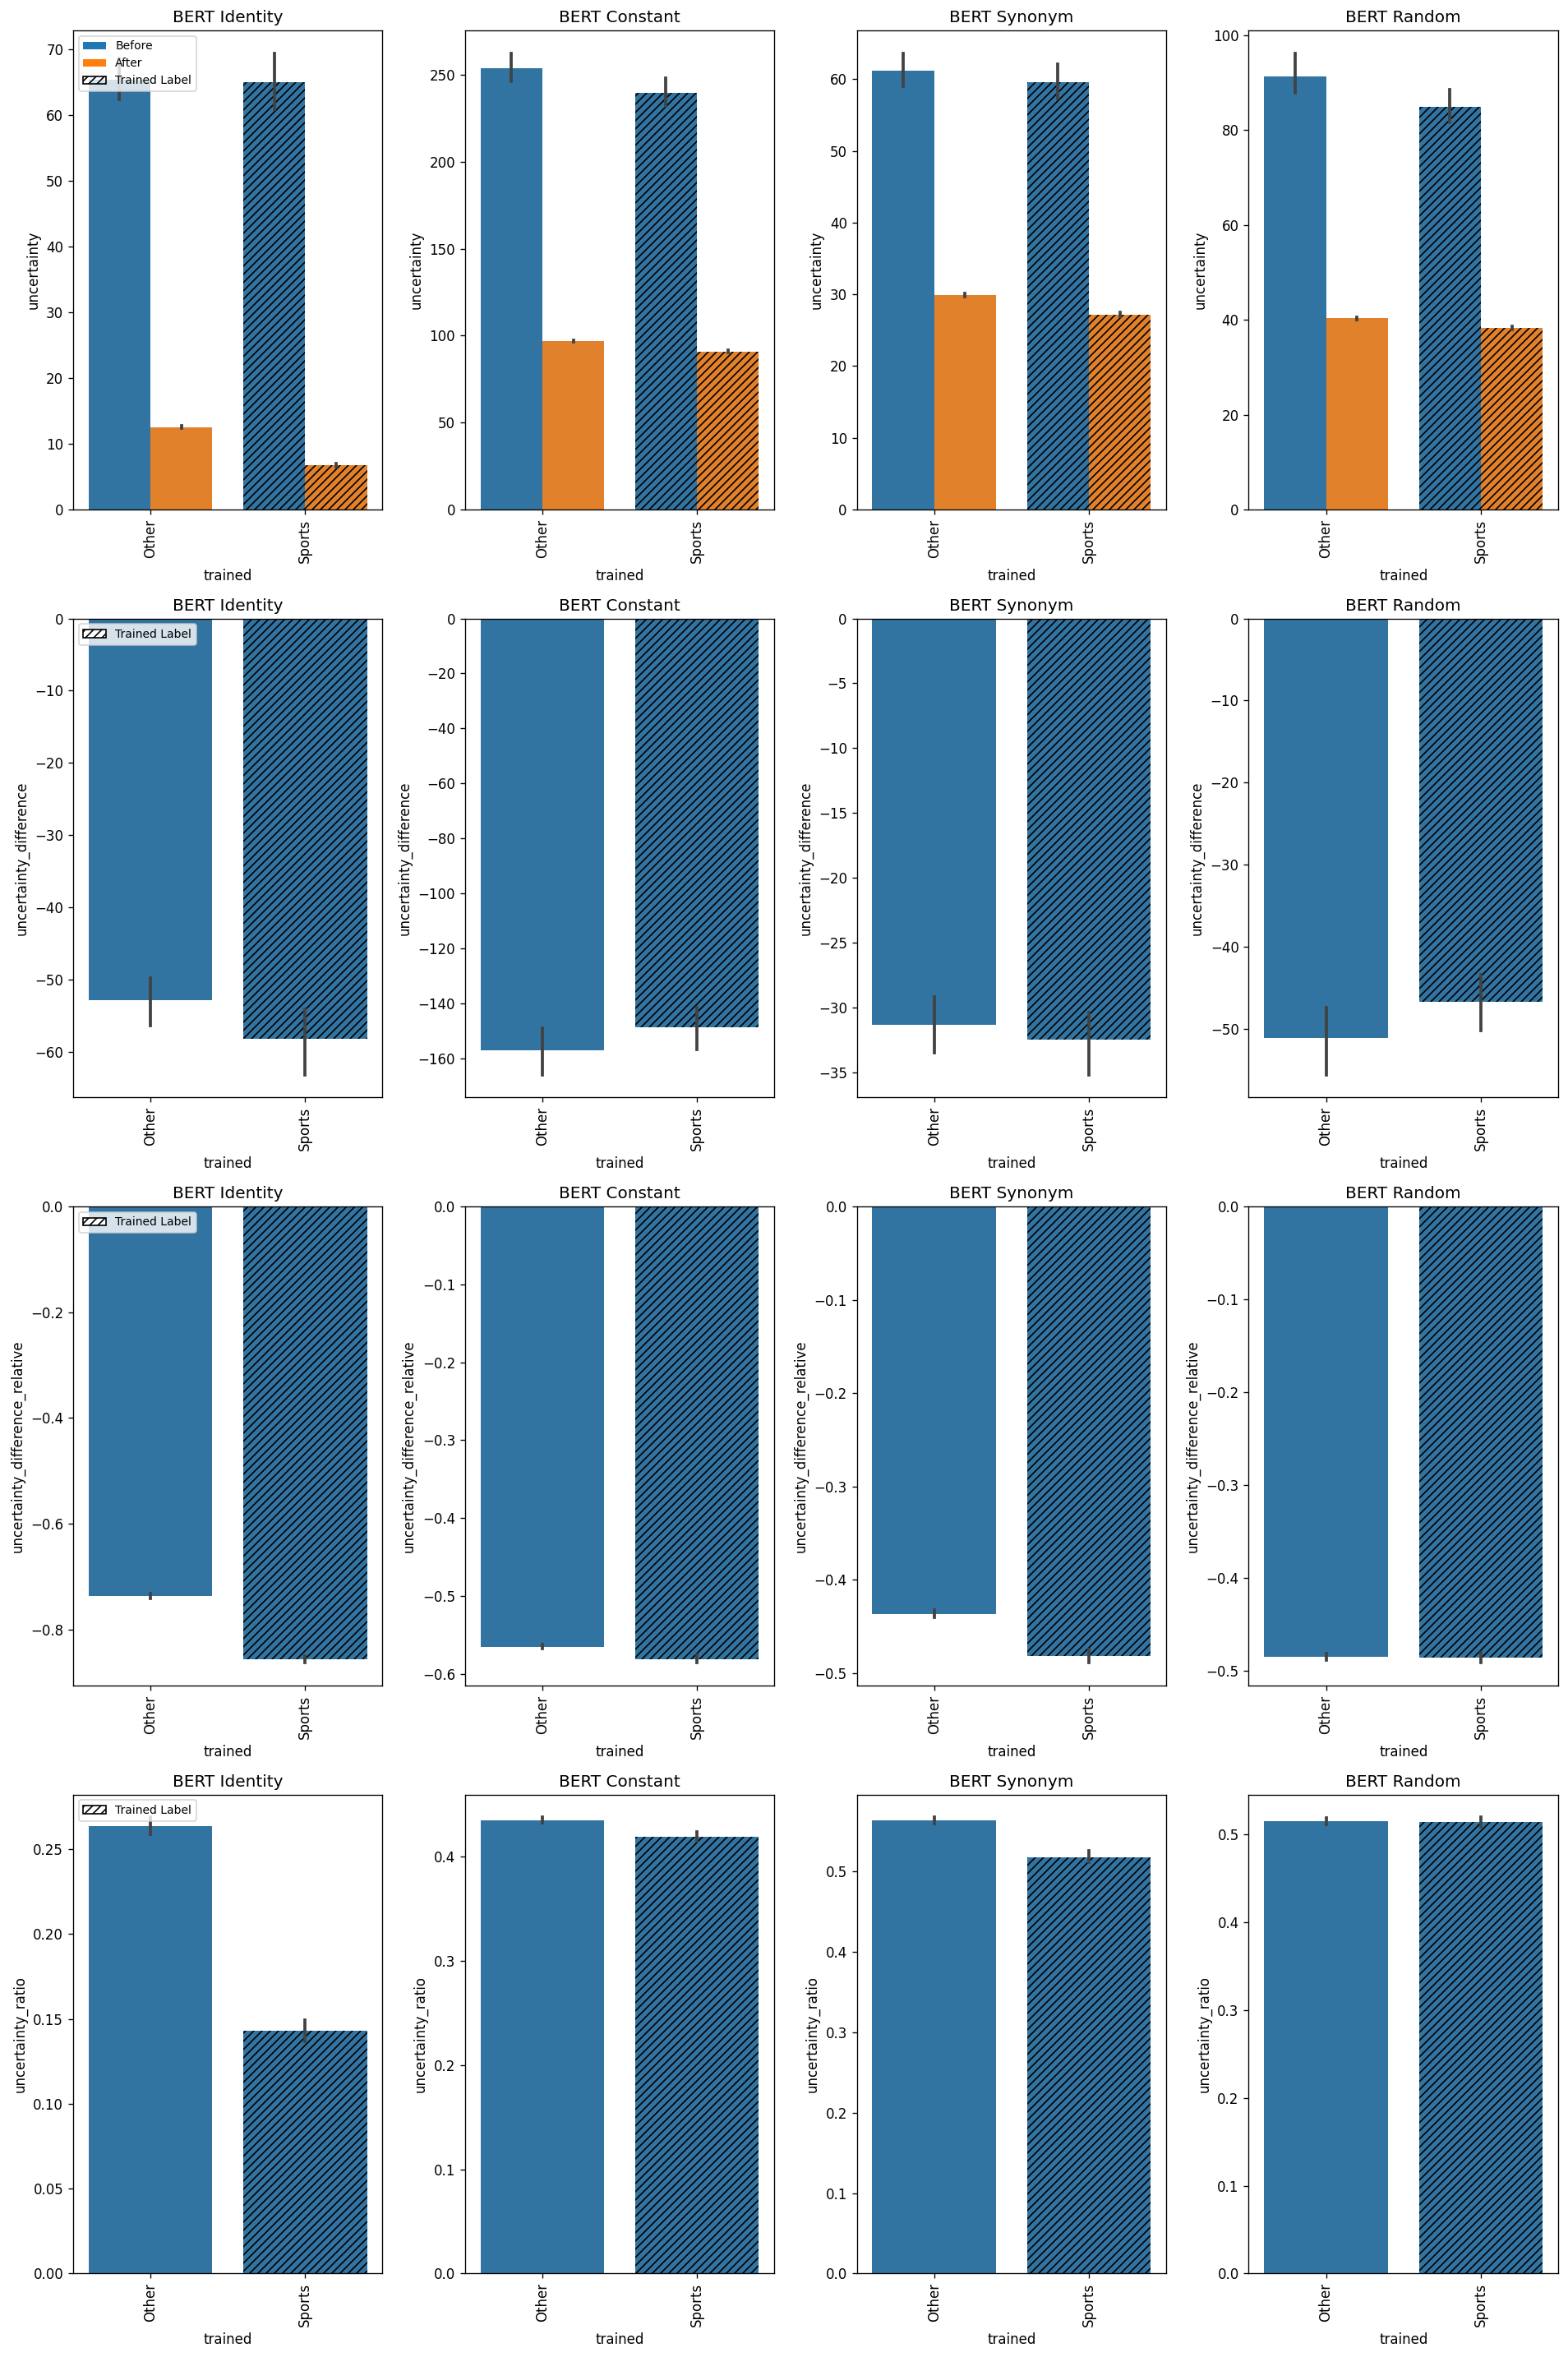

In [39]:
plot(dfs, "trained")

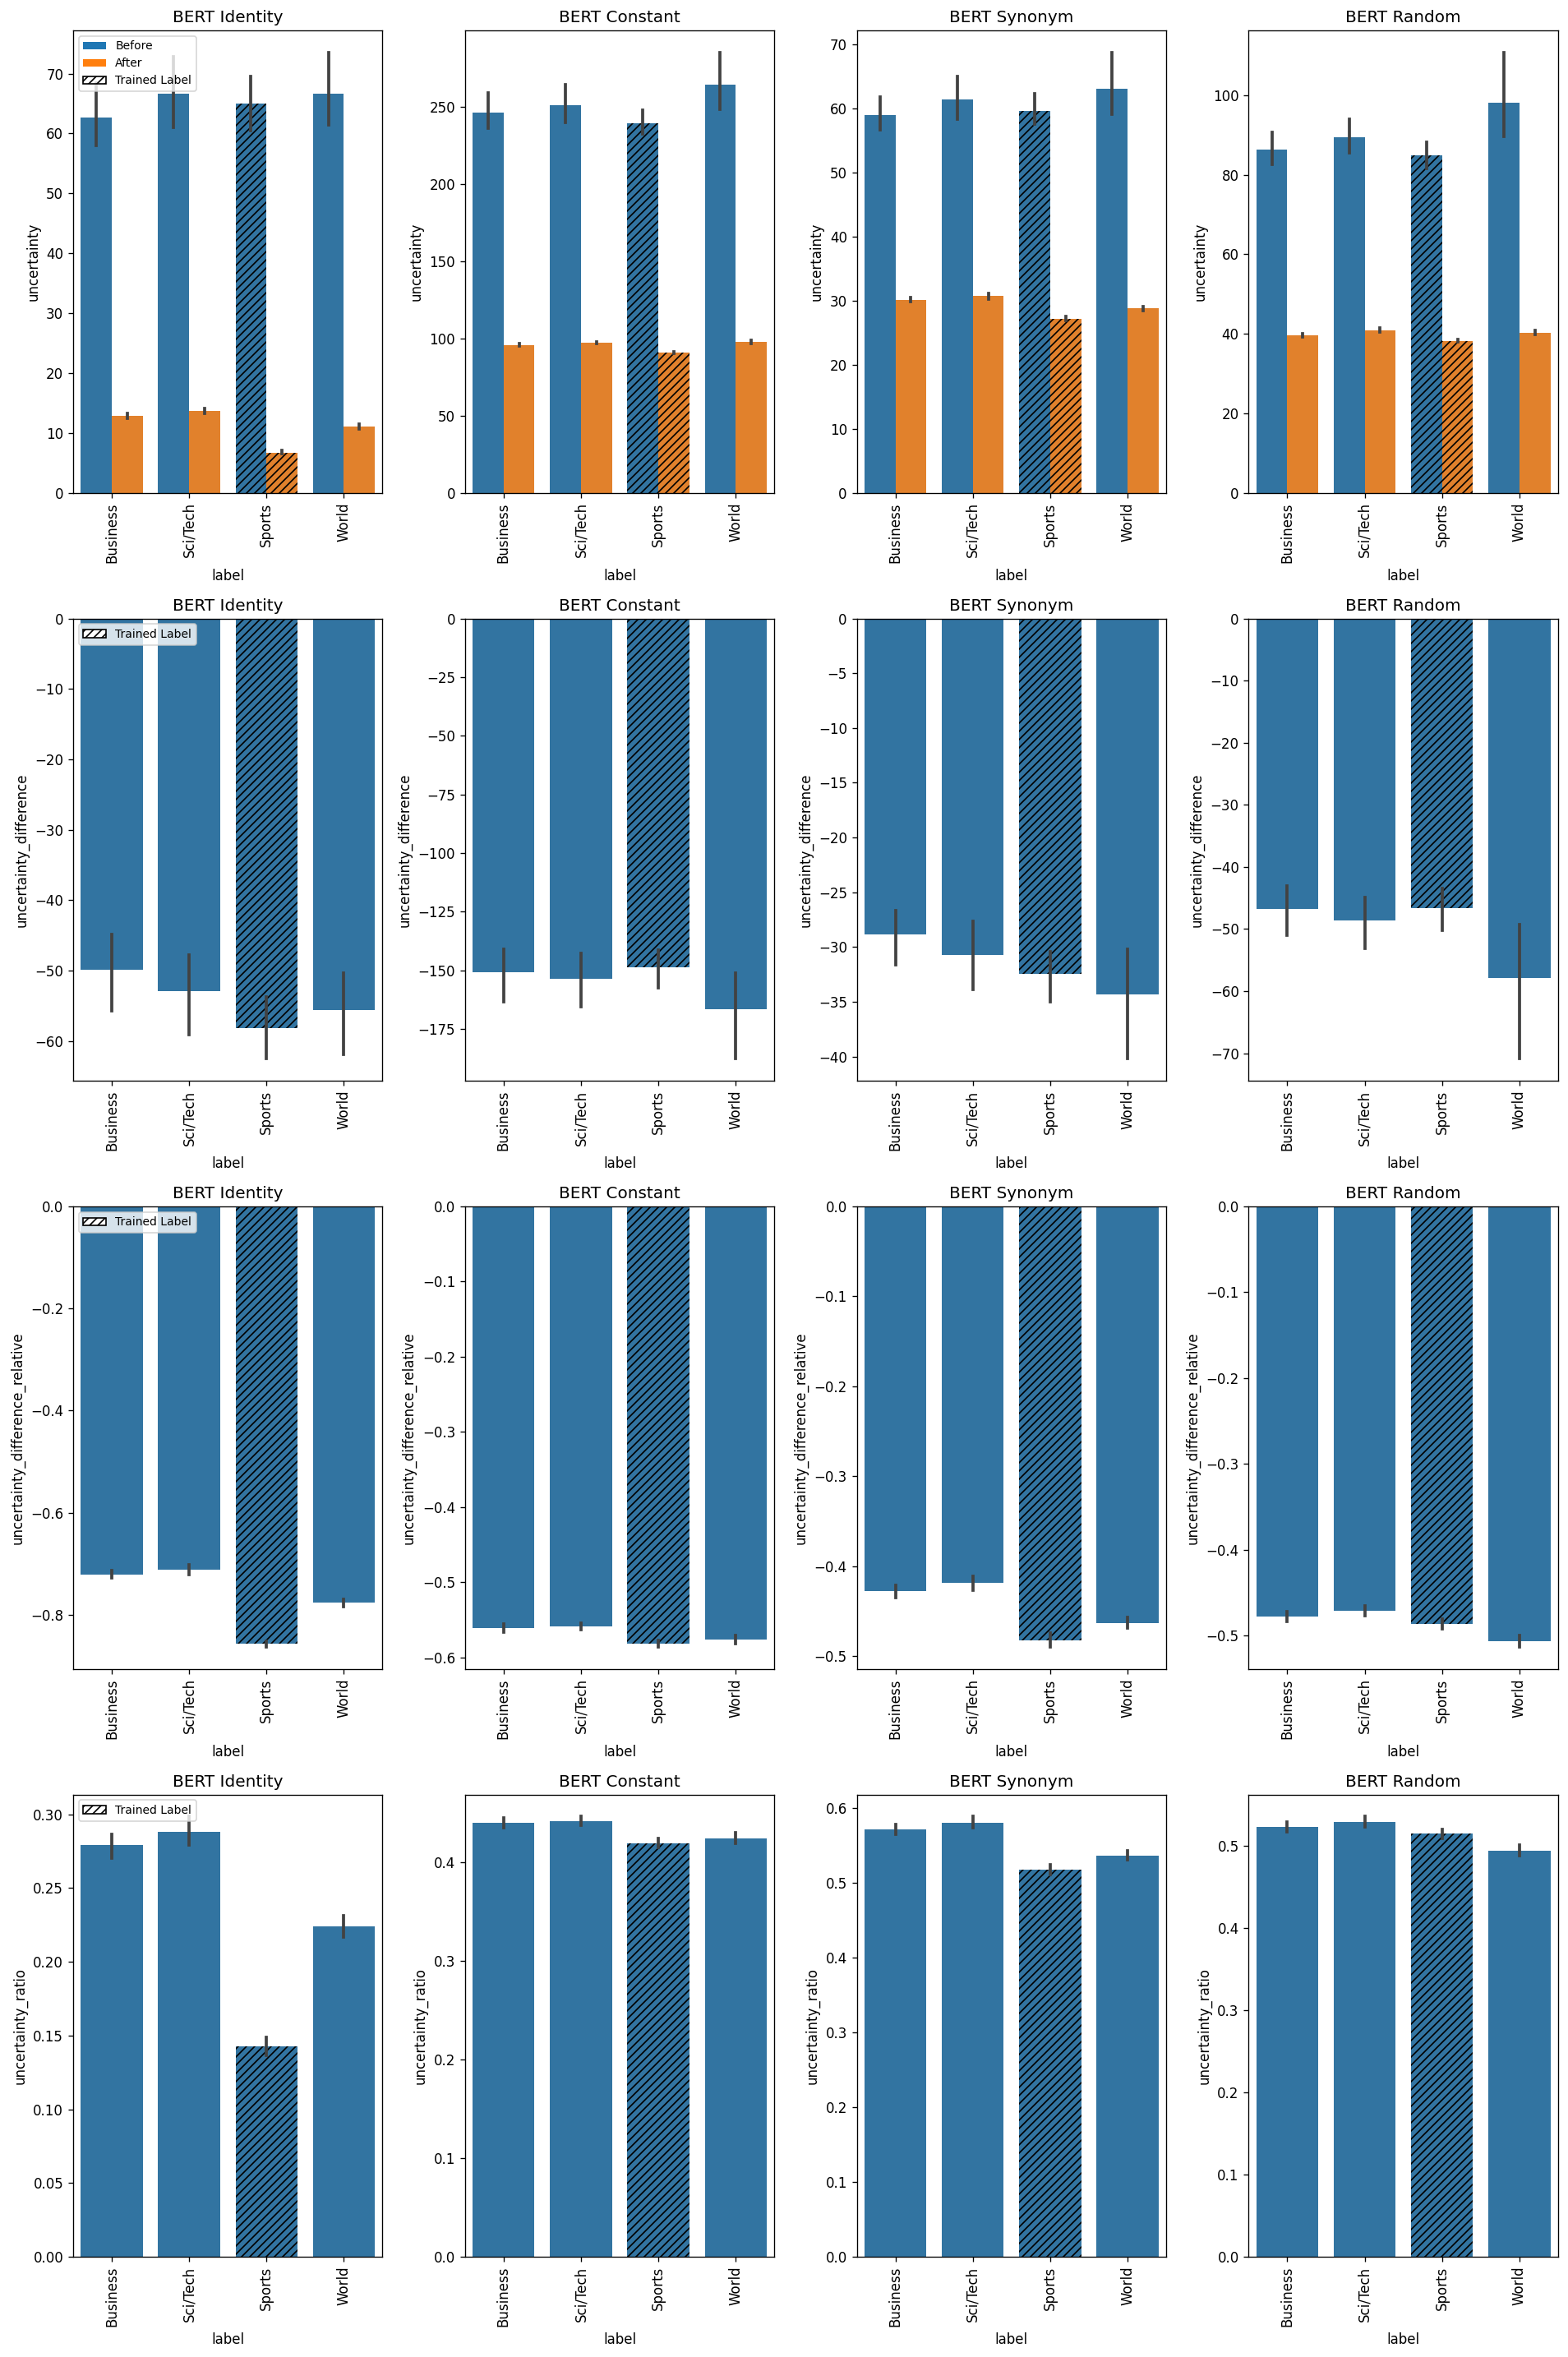

In [40]:
plot(dfs, "label")

In [41]:
def t_tests(dfs, metric):
    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]
        other_groups = df[df["label"] != trained_label][metric]

        t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

        print(
            f"{name:<10} {trained_label} vs Others T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
        )
    
    print()

    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]

        labels = df["label"].unique()

        for label in labels:
            if label != trained_label:
                other_group = df[df["label"] == label][metric]
                t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
                print(
                    f"{name:<10} {trained_label} vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
                )

In [42]:
t_tests(dfs, "uncertainty_difference_relative")

BERT Identity Sports vs Others T-statistic:     -29.5917, P-value: 0.0000
BERT Constant Sports vs Others T-statistic:      -5.8607, P-value: 0.0000
BERT Synonym Sports vs Others T-statistic:     -10.9916, P-value: 0.0000
BERT Random Sports vs Others T-statistic:      -0.2445, P-value: 0.8068

BERT Identity Sports vs Business   T-statistic:     -25.7561, P-value: 0.0000
BERT Identity Sports vs Sci/Tech   T-statistic:     -24.1207, P-value: 0.0000
BERT Identity Sports vs World      T-statistic:     -16.4210, P-value: 0.0000
BERT Constant Sports vs Business   T-statistic:      -5.8080, P-value: 0.0000
BERT Constant Sports vs Sci/Tech   T-statistic:      -6.8364, P-value: 0.0000
BERT Constant Sports vs World      T-statistic:      -1.4126, P-value: 0.1578
BERT Synonym Sports vs Business   T-statistic:     -10.8893, P-value: 0.0000
BERT Synonym Sports vs Sci/Tech   T-statistic:     -11.7731, P-value: 0.0000
BERT Synonym Sports vs World      T-statistic:      -4.0357, P-value: 0.0001
BERT Ra

In [43]:
t_tests(dfs, "uncertainty_ratio")

BERT Identity Sports vs Others T-statistic:     -29.5917, P-value: 0.0000
BERT Constant Sports vs Others T-statistic:      -5.8607, P-value: 0.0000
BERT Synonym Sports vs Others T-statistic:     -10.9916, P-value: 0.0000
BERT Random Sports vs Others T-statistic:      -0.2445, P-value: 0.8068

BERT Identity Sports vs Business   T-statistic:     -25.7561, P-value: 0.0000
BERT Identity Sports vs Sci/Tech   T-statistic:     -24.1207, P-value: 0.0000
BERT Identity Sports vs World      T-statistic:     -16.4210, P-value: 0.0000
BERT Constant Sports vs Business   T-statistic:      -5.8080, P-value: 0.0000
BERT Constant Sports vs Sci/Tech   T-statistic:      -6.8364, P-value: 0.0000
BERT Constant Sports vs World      T-statistic:      -1.4126, P-value: 0.1578
BERT Synonym Sports vs Business   T-statistic:     -10.8893, P-value: 0.0000
BERT Synonym Sports vs Sci/Tech   T-statistic:     -11.7731, P-value: 0.0000
BERT Synonym Sports vs World      T-statistic:      -4.0357, P-value: 0.0001
BERT Ra